In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt


In [2]:
import os
import io

work_dir = "descriptions_train"

data = []
for index in range(0, 1000):
    name = "{index}.txt".format(index=index)
    path = os.path.join(work_dir, name)
    with io.open(path, mode="r", encoding="utf-8") as fd:
        content = fd.read()
        data.append(content)

df = pd.DataFrame(data, columns = ['data'])
df.head()

,data
0,The skateboarder is putting on a show using th...
1,"A bowl of soup that has some carrots, shrimp, ..."
2,A man who is walking across the street.\nA bus...
3,A young boy throwing a frisbee in a grassy fie...
4,A young child in the yard holding up a bat.\nA...


In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

#%%

def cleaning_sentence(sentences):
    cl_word = []
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer() 
    lemmatizer = WordNetLemmatizer() 
    for s in sentences:
        words = word_tokenize(s.lower()) #lower and tokenize
        words = [w for w in words if w.isalpha()] #remove punctuation
        words = [w for w in words if not w in stop_words] #remove stop word
        words = [ps.stem(w) for w in words] #remove stem
        words = [lemmatizer.lemmatize(w,pos ="a") for w in words] #lemmatize
        cl_word.append(words)
    return cl_word


In [4]:
x = cleaning_sentence(data)

In [5]:
print(x[0])

['skateboard', 'put', 'show', 'use', 'picnic', 'tabl', 'stage', 'skateboard', 'pull', 'trick', 'top', 'picnic', 'tabl', 'man', 'ride', 'skateboard', 'top', 'tabl', 'skate', 'boarder', 'trick', 'picnic', 'tabl', 'person', 'ride', 'skateboard', 'picnic', 'tabl', 'crowd', 'watch']


In [15]:
#need unique word!!!!
# only noun ? 
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', " ",str(doc))
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)


In [16]:
norm_corpus = normalize_corpus(data)
norm_corpus

array(['skateboarder putting show using picnic table stage skateboarder pulling tricks top picnic table man riding skateboard top table skate boarder trick picnic table person riding skateboard picnic table crowd watching',
       'bowl soup carrots shrimp noodles healthy food bowl ready eat soup carrots shrimp sits next chopsticks tasty bowl ramen served someone enjoy bowl asian noodle soup shrimp carrots',
       'man walking across street busy intersection ice cream truck driving man walks behind ice cream truck man crossing street near icecream truck man walking behind concession bus',
       'young boy throwing frisbee grassy field young boy park throwing frisbee young boy throws frisbee tree lined park kid city park throws bright green frisbee boy throwing green frisbee grass field',
       'young child yard holding bat boy raring back baseball bat yard little boy baseball bat yard boy black clothes holds baseball bat shoulder near fence tree little boy playing yard baseball bat'

In [20]:
# bag of words
bags  = set()
for sent in x:
    for word in sent:
        bags.add(word)

bags = list(bags) 
train_feature_vector = [] #create train_feature vec
for row in x:
    a = [0]*len(bags)
    for i in row:
        a[bags.index(i)] = 1
    train_feature_vector.append(a)

In [21]:
import pprint
pp = pprint.PrettyPrinter(compact=True)
pp.pprint(train_feature_vector[0:1])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
np.shape(train_feature_vector[0:1])

(1, 2399)

In [23]:
#k-means for csv file

In [19]:
train_resnet =  pd.read_csv('features_train/features_resnet1000_train.csv',header = None) 

In [20]:
train_resnet.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,images_train/5373.jpg,-0.899450,-0.930470,-2.503365,-3.172499,-2.819133,0.992159,-3.698863,0.619991,0.956148,...,-3.021916,2.214253,-1.382491,1.672911,1.014233,2.599949,2.773284,-2.066632,0.385754,-3.241320
1,images_train/984.jpg,-1.346954,-3.119461,-0.765971,-1.382550,-1.104675,-3.656271,-4.815436,-0.556942,-1.402286,...,0.011003,-3.968805,-2.694711,-4.196480,-2.880234,-1.210742,-1.605143,-4.859987,-0.837670,-0.967604
2,images_train/7127.jpg,-3.445498,-1.524573,-1.001654,-3.668335,-1.805517,-1.633496,-7.127826,-1.147802,-1.055816,...,-2.991777,-2.628053,-2.971074,-2.537039,-1.707429,1.013672,0.608460,-3.714998,-0.484735,0.138767
3,images_train/9609.jpg,1.114650,-2.167102,0.097881,-1.336255,0.853483,-0.374885,-2.369090,-2.273191,-1.143788,...,-1.248134,-0.633126,-1.723514,-2.638832,0.097149,4.647974,1.030138,-2.193836,1.044024,0.176043
4,images_train/5293.jpg,1.602650,-1.505817,3.029409,4.092412,1.711755,6.271253,4.173686,-2.177313,0.747789,...,-1.285806,-2.266481,-3.898053,2.295787,-1.749552,0.974188,1.258117,-1.975622,-1.278643,-1.941441


In [21]:
train_resnet_feature = train_resnet.iloc[:, 1:-1]

In [22]:
train_resnet_feature.head()

,1,2,3,4,5,6,7,8,9,10,...,990,991,992,993,994,995,996,997,998,999
0,-0.899450,-0.930470,-2.503365,-3.172499,-2.819133,0.992159,-3.698863,0.619991,0.956148,-0.218699,...,-2.669892,-3.021916,2.214253,-1.382491,1.672911,1.014233,2.599949,2.773284,-2.066632,0.385754
1,-1.346954,-3.119461,-0.765971,-1.382550,-1.104675,-3.656271,-4.815436,-0.556942,-1.402286,1.426897,...,-2.743187,0.011003,-3.968805,-2.694711,-4.196480,-2.880234,-1.210742,-1.605143,-4.859987,-0.837670
2,-3.445498,-1.524573,-1.001654,-3.668335,-1.805517,-1.633496,-7.127826,-1.147802,-1.055816,-2.571585,...,-1.714004,-2.991777,-2.628053,-2.971074,-2.537039,-1.707429,1.013672,0.608460,-3.714998,-0.484735
3,1.114650,-2.167102,0.097881,-1.336255,0.853483,-0.374885,-2.369090,-2.273191,-1.143788,-0.366391,...,-2.614928,-1.248134,-0.633126,-1.723514,-2.638832,0.097149,4.647974,1.030138,-2.193836,1.044024
4,1.602650,-1.505817,3.029409,4.092412,1.711755,6.271253,4.173686,-2.177313,0.747789,-1.183095,...,-2.559330,-1.285806,-2.266481,-3.898053,2.295787,-1.749552,0.974188,1.258117,-1.975622,-1.278643


In [23]:
train_resnet_name = train_resnet.iloc[:, 0]

In [24]:
train_resnet_feature = np.array(train_resnet_feature)

In [26]:
train_resnet_name = np.array(train_resnet_name)

In [27]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [28]:
#takes 1 hour
model = MDS(n_components=2, dissimilarity='euclidean')
train_resnet_out = model.fit_transform(train_resnet_feature)

In [29]:
print(train_resnet_out)

[[ 17.7857968  -54.77162256]
 [-45.65354827 -45.76158562]
 [ 67.59049168  -3.13349628]
 ...
 [-64.74988292 -27.78924495]
 [ -7.45349097  80.28718105]
 [-44.33186069  -2.73463394]]


In [30]:
x =train_resnet_out[:, 0]
y = train_resnet_out[:, 1]

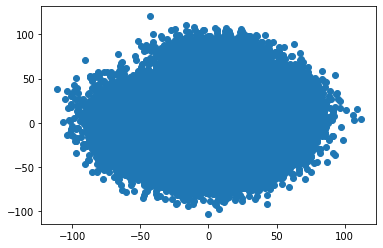

In [31]:
plt.scatter(x, y)

In [32]:
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as shc

In [33]:
kmed = KMedoids(n_clusters=100, random_state=0)
y_kmed = kmed.fit_predict(train_resnet_out)

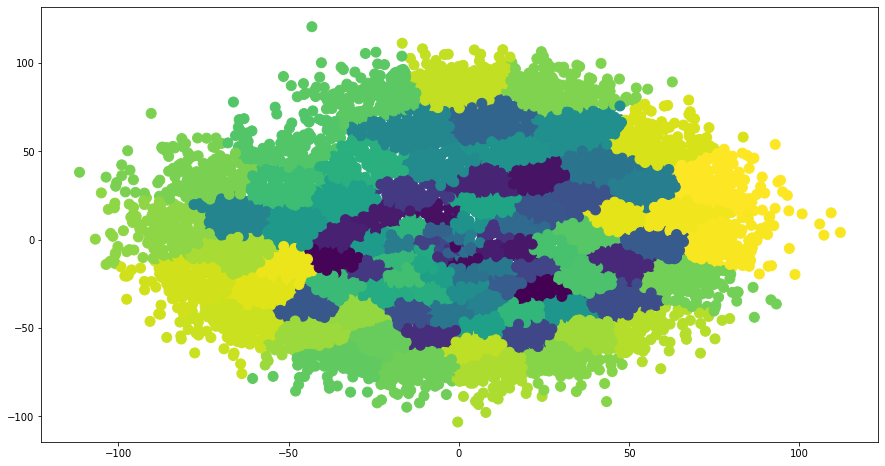

In [41]:
plt.figure(figsize=(15,8))
plt.scatter(train_resnet_out[:, 0], train_resnet_out[:, 1], c=y_kmed, s=100, cmap='viridis')
plt.show()